<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [4]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [5]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot

import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols



#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [10]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


Text(0.5, 1.0, 'Owner-occupied homes')

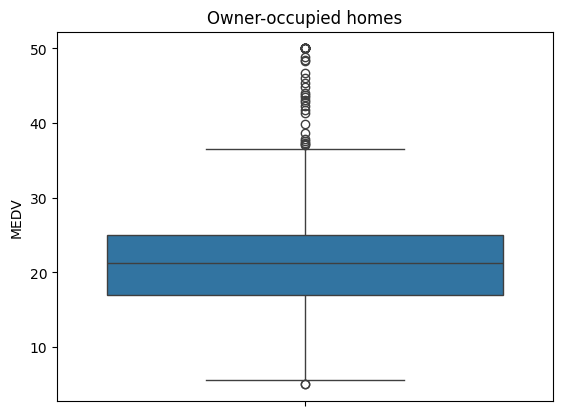

In [6]:
#Task 2: Question1	For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(y = 'MEDV', data = boston_df)
ax.set_title('Owner-occupied homes')

Text(0.5, 1.0, 'Median value of owner-occupied homes per Age Group')

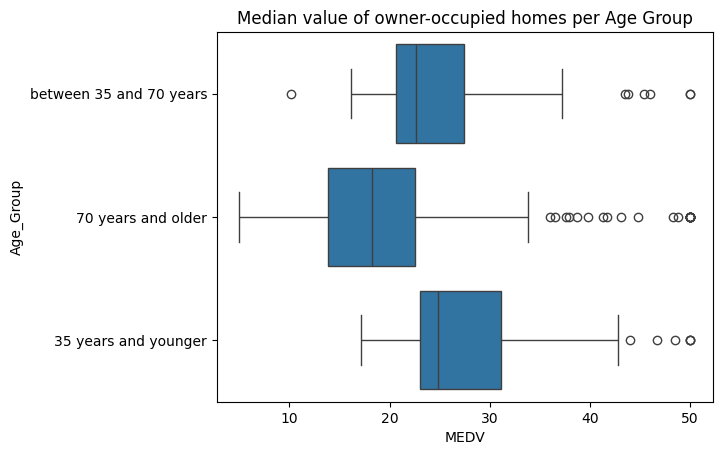

In [7]:
#Question 3: 	Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'
ax3 = sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df)
ax3.set_title('Median value of owner-occupied homes per Age Group')

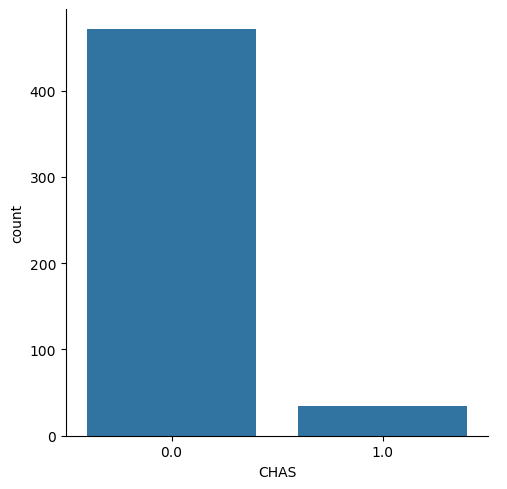

In [17]:
# #Task 2: Question 2 •	Provide a bar plot for the Charles river variable
sns.catplot(x='CHAS', kind='count', data = boston_df)

[Text(0.5, 1.0, 'Median value of owner-occupied homes (Charles river variable)'),
 Text(0.5, 0, 'tract bounds river'),
 Text(0, 0.5, "$1000's")]

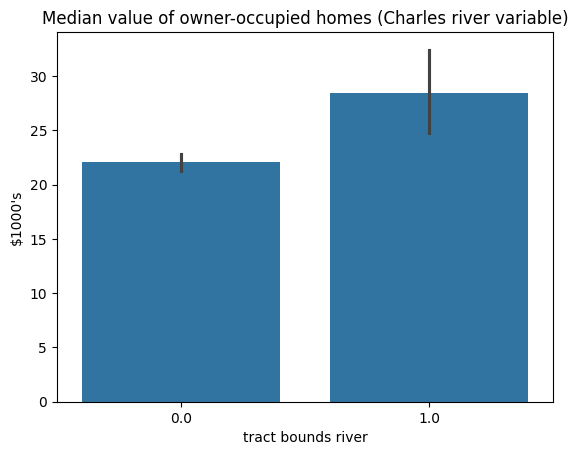

In [12]:
sns.barplot(boston_df, x="CHAS", y="MEDV").set(title='Median value of owner-occupied homes (Charles river variable)', 
                                               xlabel="tract bounds river",ylabel="$1000's")

Text(0.5, 1.0, 'Nitric oxide concentration per proportion of non-retail business acres per town')

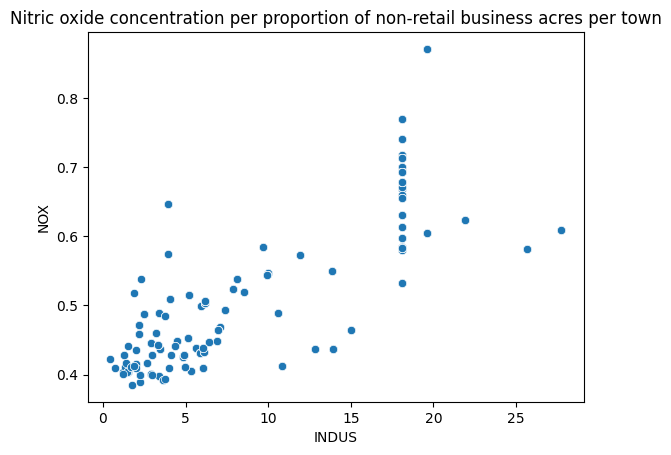

In [19]:
##Task 2: Question 4: 	Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

ax4 = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
ax4.set_title('Nitric oxide concentration per proportion of non-retail business acres per town')

Text(0, 0.5, 'count of neigborhoods')

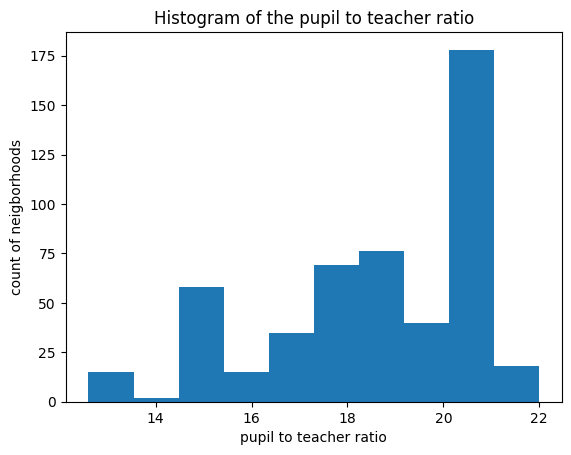

In [11]:
##Task 2: Question 5: Create a histogram for the pupil to teacher ratio variable
#ax5 = sns.countplot(x = 'PTRATIO', data = boston_df)
#ax5.set_title('Pupil to teacher ratio per town')

pyplot.hist(boston_df["PTRATIO"])
pyplot.title("Histogram of the pupil to teacher ratio")
pyplot.xlabel("pupil to teacher ratio")
pyplot.ylabel("count of neigborhoods")

In [7]:
# Task 3: Q1 Is there a significant difference in median value of houses bounded by the Charles river or not?
import scipy.stats

Text(0.5, 1.0, 'Median Value of Houses Bounded by the Charles River')

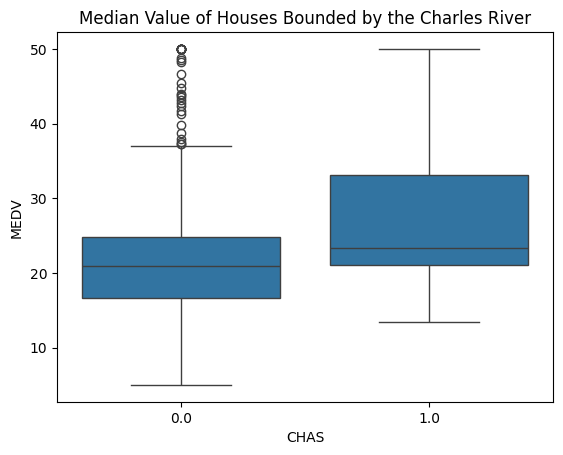

In [14]:
sns.boxplot(x='CHAS', y='MEDV', data=boston_df).set_title('Median Value of Houses Bounded by the Charles River')

In [19]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Text(0.5, 1.0, 'Median value of owner-occupied homes per Age Group')

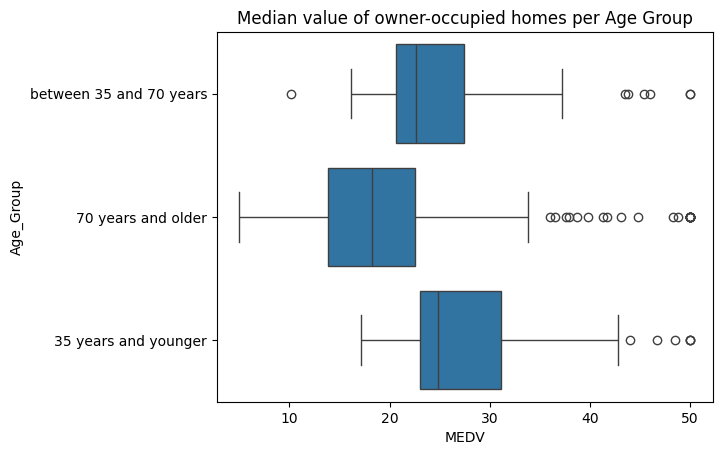

In [27]:
# task 3:  Question 2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

ax3 = sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df)
ax3.set_title('Median value of owner-occupied homes per Age Group')

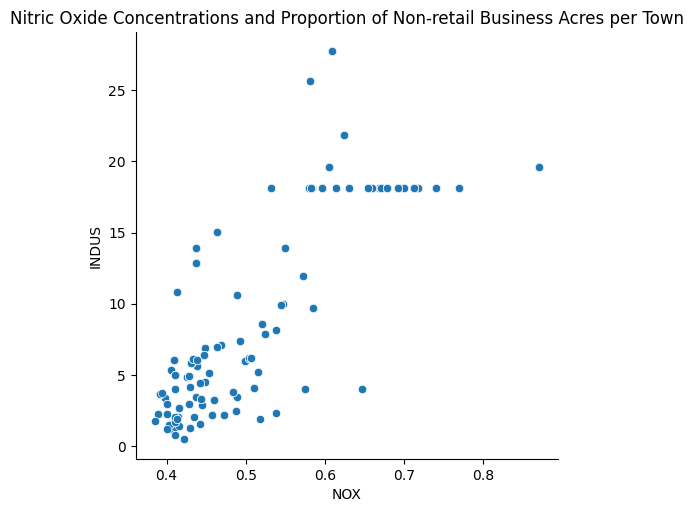

In [21]:
#Task 3:Question #3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
sns.relplot(x='NOX', y='INDUS', data=boston_df).set(title='Nitric Oxide Concentrations and Proportion of Non-retail Business Acres per Town')

In [22]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

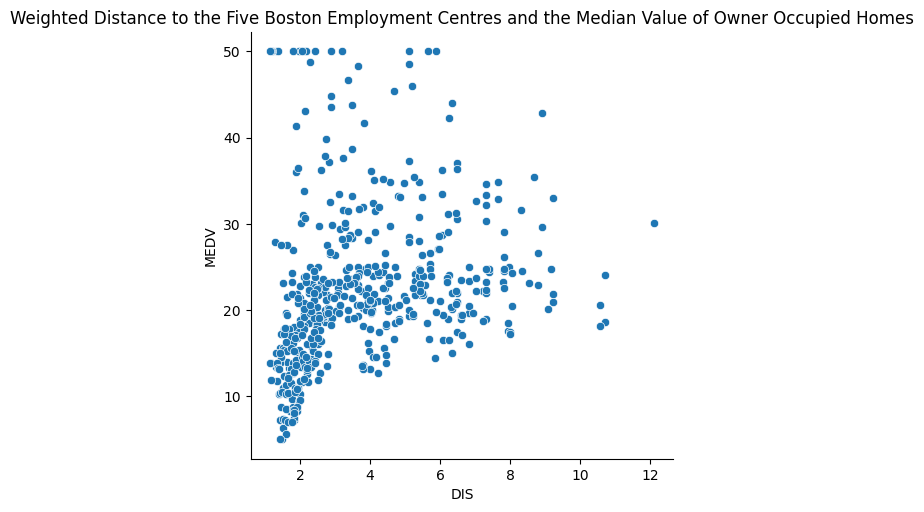

In [23]:
#Task 3: Question #4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?
sns.relplot(x='DIS', y='MEDV', data=boston_df).set(title='Weighted Distance to the Five Boston Employment Centres and the Median Value of Owner Occupied Homes')

In [24]:
scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])

PearsonRResult(statistic=0.2499287340859039, pvalue=1.2066117273371074e-08)